# Churn Analysis
 

#### Dataset Info: Sample Data Set containing customer data and showing customers who have left last month

In [2]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import pandas
df = pandas.read_csv('CustomerChurn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# check the various attributes of data like shape (rows and columns) and columns datatype
df.shape

(7043, 21)

In [5]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [6]:
df.dtypes 

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

#### here we noted that total charges should be in numerical datatype

In [7]:
# check descrptives statistics of numerical varaible
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


#### SeniorCitizen is actually a categorical hence the 25%-50%-75% distribution is not propoer
#### 75% customers have tenure less than 55 months
#### Average Monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month

In [8]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [9]:
churn=df['Churn'].value_counts()/len(df)*100
churn

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

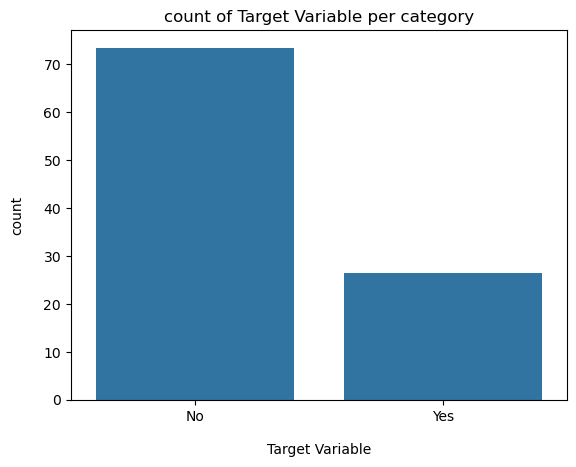

In [10]:
sns.barplot(x=churn.index,y=churn.values)
plt.xlabel("Target Variable",labelpad=14)
plt.ylabel("count",labelpad=14)
plt.title("count of Target Variable per category")
plt.show()

#### Data is highly imbalanced,ratio=73.27
#### So we analyse the data with other features while taking the target valuesseparately to get some insights

In [11]:
#concsie summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


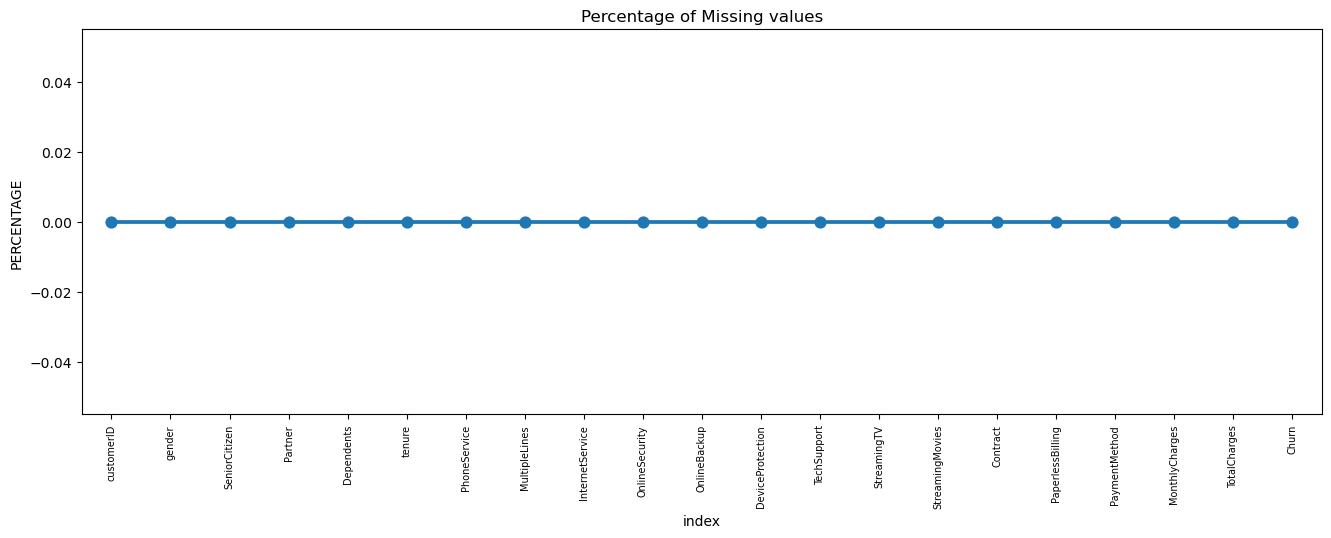

In [12]:
 missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
# Fix: Use named parameters for x, y, and data in pointplot
ax = sns.pointplot(x='index', y=0, data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

##### Missing Data - Initial Intuition¶
##### Here, we don't have any missing data.

## Data Cleaning

#### 1.Create a copy of base data for manupulation and processing

In [13]:
new_df=df.copy()

##### 2.Total Charges should be numeric amount .Let's convert it to numerical datatype

In [14]:
new_df.TotalCharges=pd.to_numeric(new_df.TotalCharges, errors='coerce')
new_df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [15]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### 3.As we can see there are 11 missing values in TotalCharges column .Let's check these records

In [16]:
new_df.loc[new_df['TotalCharges'].isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


#### 4.. Missing Value Treatment

 #### Since % of these records compared to total dataset is very low is 0.15%.it is safr to ignore

In [17]:
# removing misssing values
new_df.dropna(how='any',inplace=True)

In [18]:
# get the max tenure
print(new_df['tenure'].max())

72


In [19]:
labels=["{0}-{1}".format(i,i+11) for  i in range(1,72,12)]
labels

['1-12', '13-24', '25-36', '37-48', '49-60', '61-72']

In [20]:
labels=["{0}-{1}".format(i,i+11) for  i in range(1,72,12)]
new_df['tenure_group']=pd.cut(new_df.tenure,range(1,80,12) ,right=False ,labels=labels) 

In [21]:
new_df['tenure_group'].value_counts()

tenure_group
1-12     2175
61-72    1407
13-24    1024
25-36     832
49-60     832
37-48     762
Name: count, dtype: int64

In [22]:
new_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


#### 6 Remove columns customer ID and tenure

In [23]:
# drop column customerID and tenure
new_df.drop(columns =['customerID','tenure'],axis=1,inplace=True)

In [24]:
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


## Data Exploration

#### 1. plot distribution of individual by churn

## Univariate Analysis

In [25]:
new_df.head(5)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


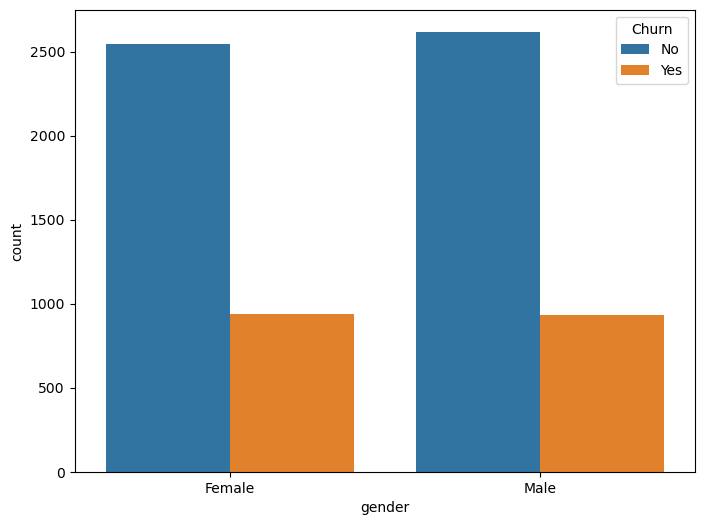

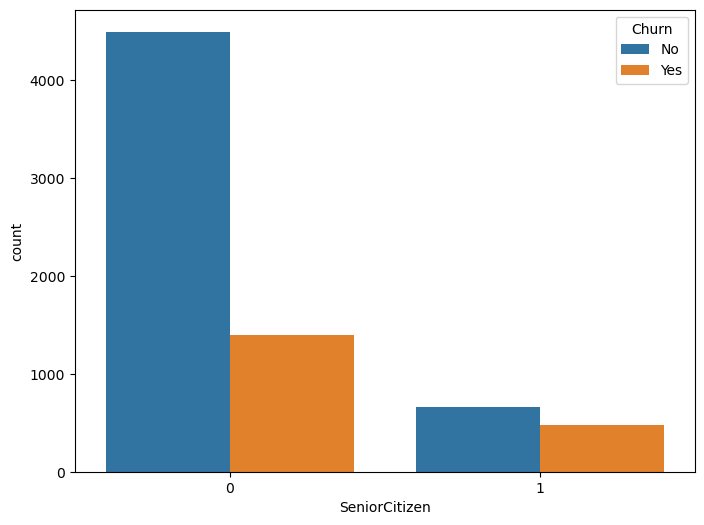

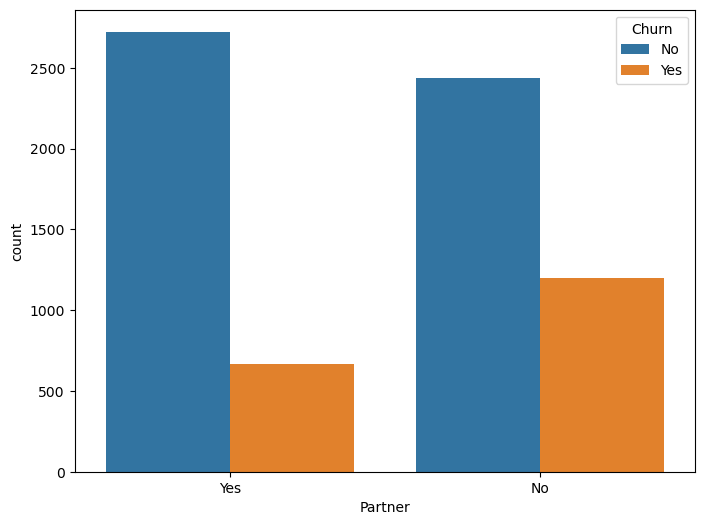

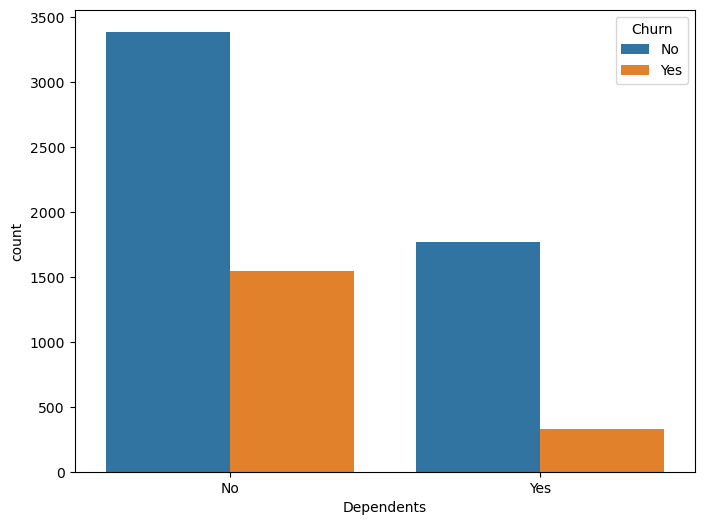

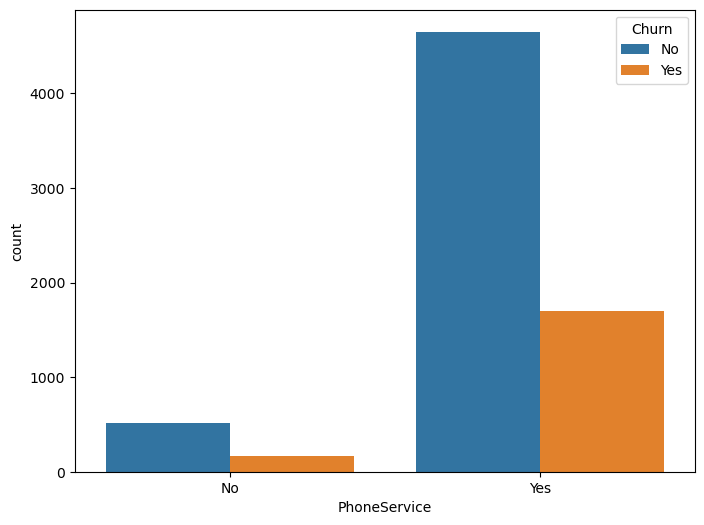

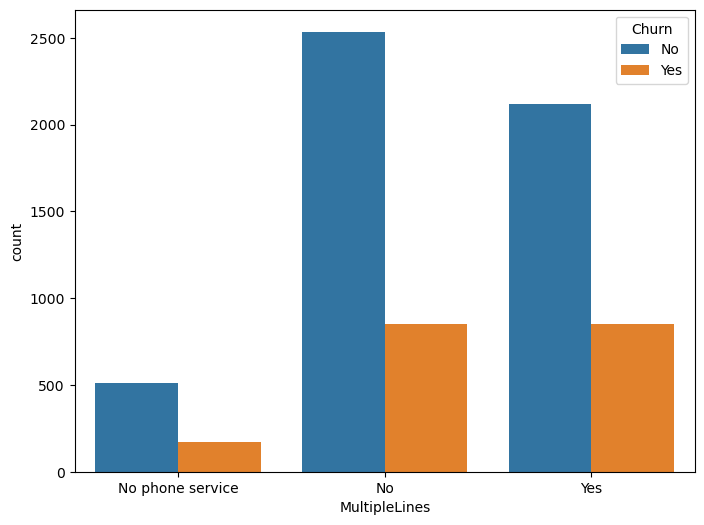

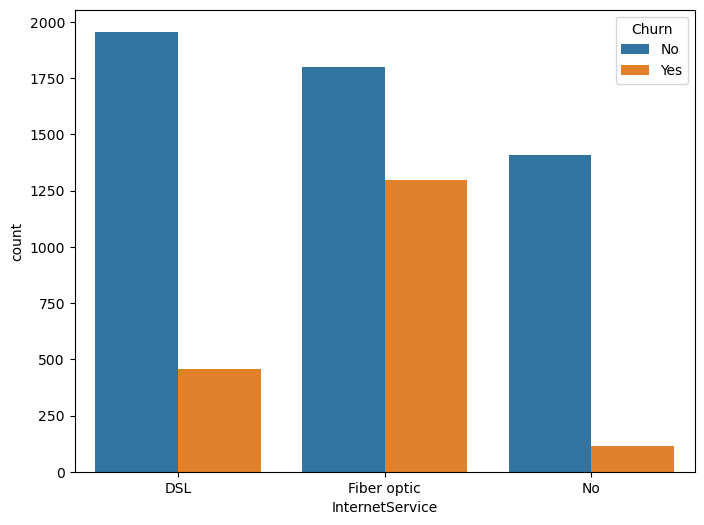

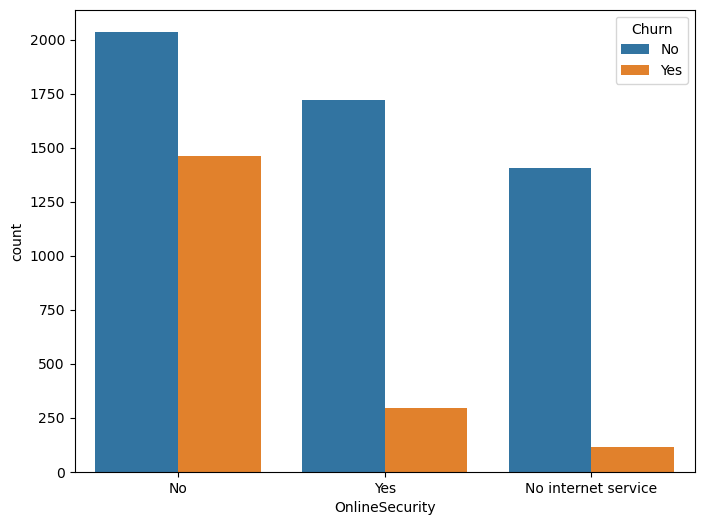

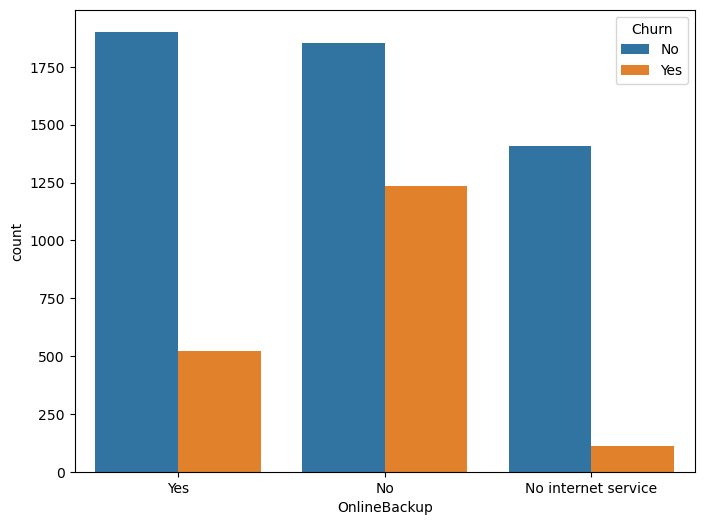

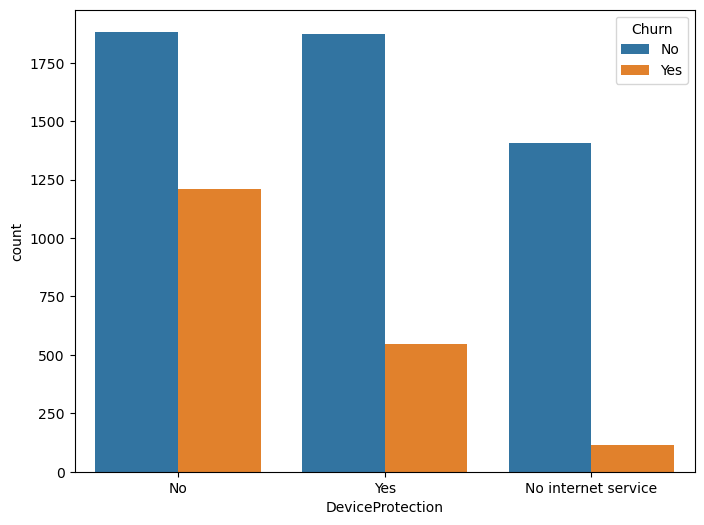

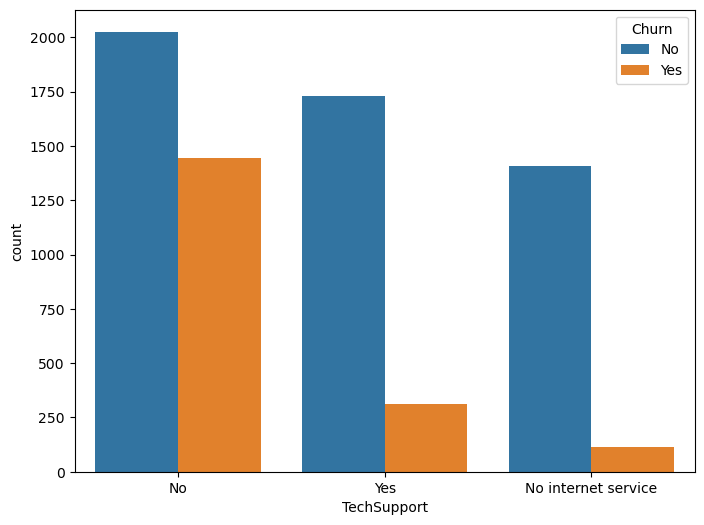

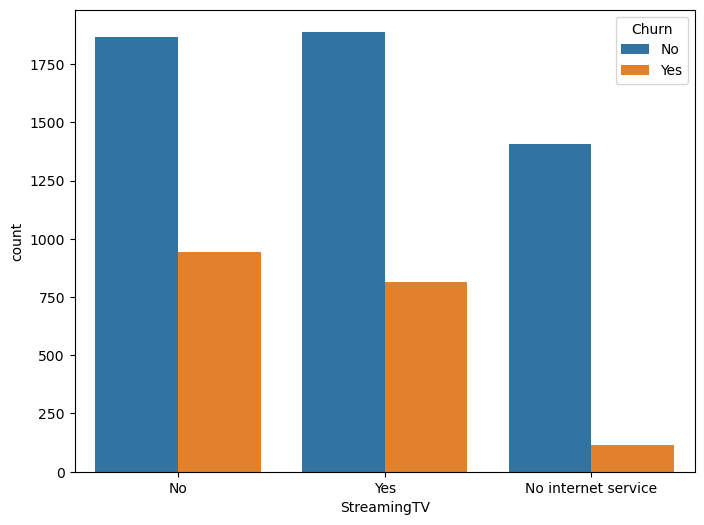

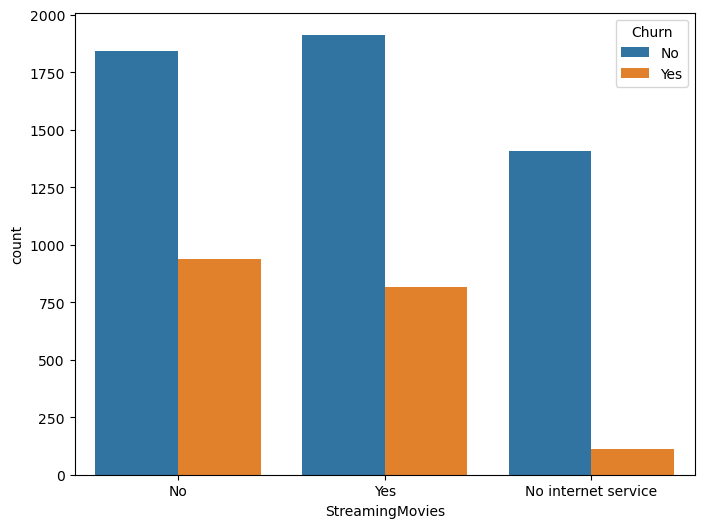

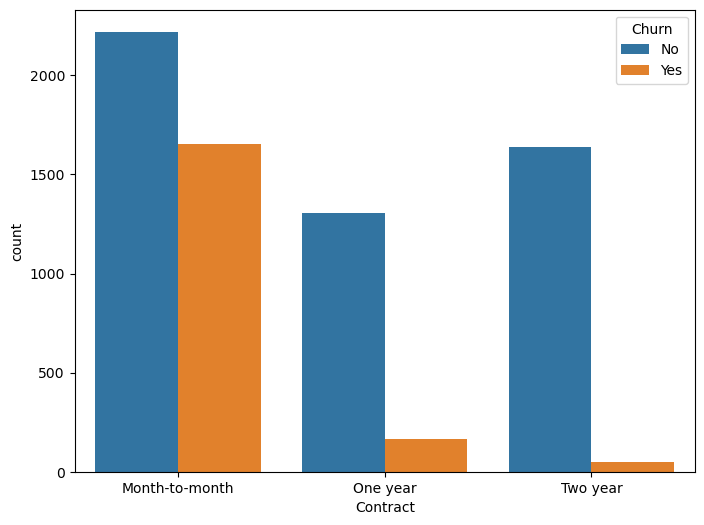

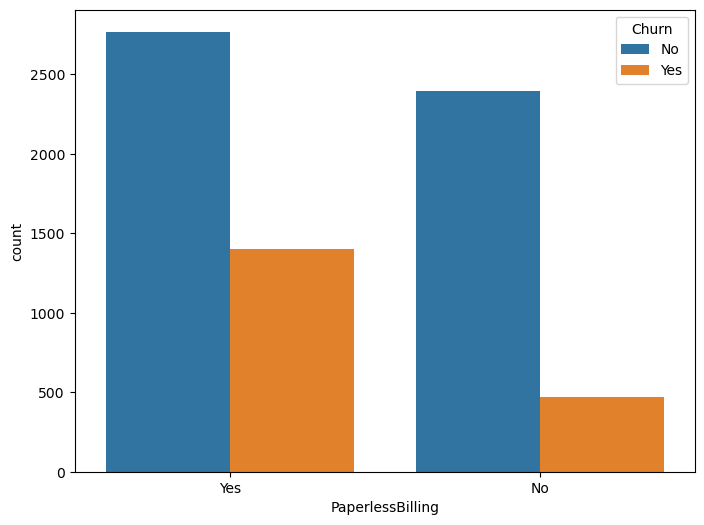

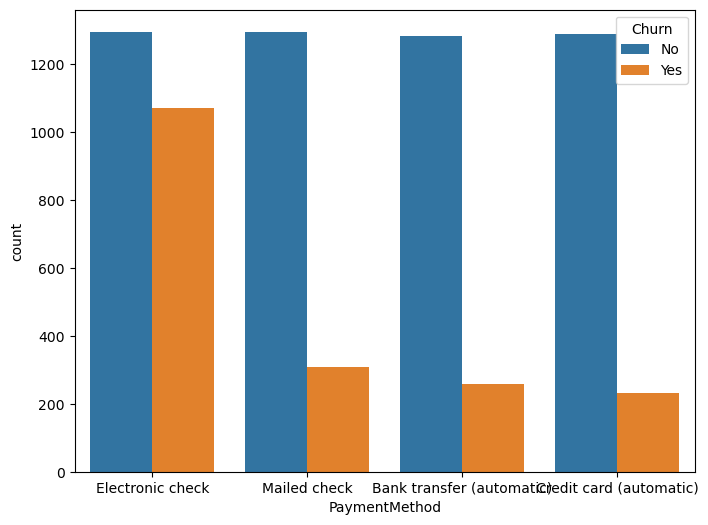

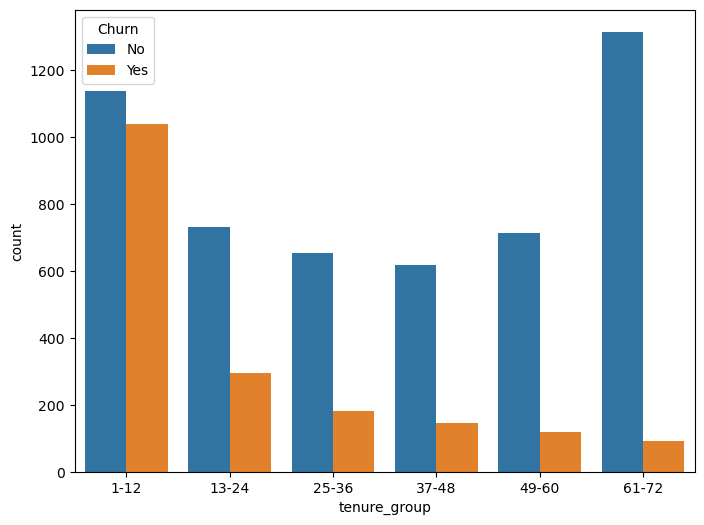

In [29]:
for i, predictor in enumerate(new_df.drop(columns=['Churn','TotalCharges','MonthlyCharges'])):
    plt.figure(i,figsize=(8,6))
    sns. countplot(data=new_df,x=predictor,hue='Churn')
    plt.show()

#### 2. Convert the target variable 'Churn' in a binary numeric variable i.e. Yes=1 ; No = 0

In [26]:
new_df['Churn'] = np.where(new_df.Churn == 'Yes',1,0)
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1-12


#### 3. Convert all the categorical variables into dummy variables

In [27]:
new_df_dumies=pd.get_dummies(new_df)
new_df_dumies.head()


,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29.85,29.85,0,True,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,1,False,True,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,0,False,True,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,1,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,False,False


#### 9 .Relationship between Monthly Charges and Total Charges

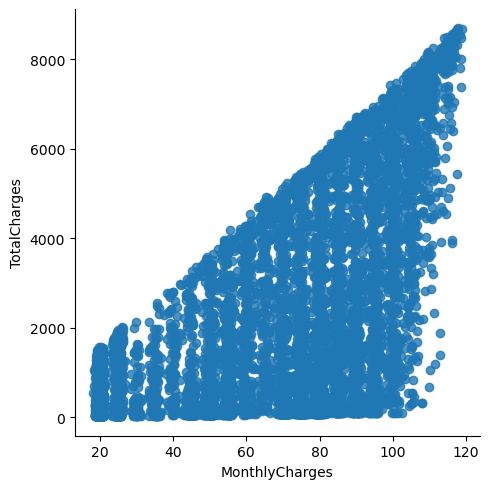

In [28]:
sns.lmplot(data=new_df_dumies,x='MonthlyCharges',y='TotalCharges',fit_reg=False)
plt.show()

In [29]:
new_df_dumies['MonthlyCharges'].corr(new_df_dumies['TotalCharges'])

np.float64(0.6510648032262024)

In [30]:
# correlation is range beteen 0 to 1 if correlatin value is nearest to one thn they are poistively co reeated


##### Total Charges increase as Monthly Charges increase -as expected

#### 10. Churn by Monthly Charges and Total Charges 

C:\Users\laiba\AppData\Local\Temp\ipykernel_16088\660600951.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth= sns.kdeplot(new_df_dumies.MonthlyCharges[(new_df_dumies['Churn']== 0)],
C:\Users\laiba\AppData\Local\Temp\ipykernel_16088\660600951.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth= sns.kdeplot(new_df_dumies.MonthlyCharges[(new_df_dumies['Churn']== 1)],


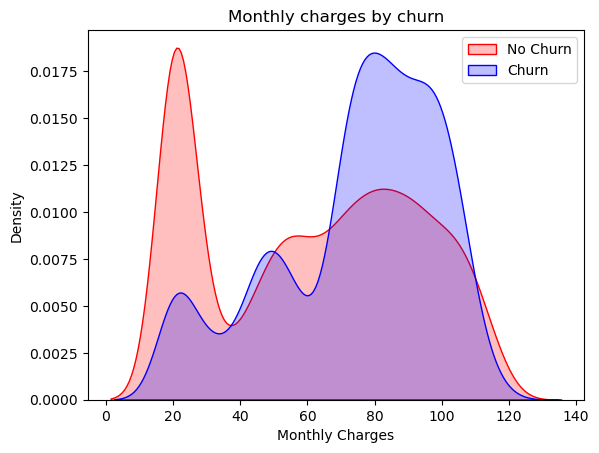

In [31]:
Mth= sns.kdeplot(new_df_dumies.MonthlyCharges[(new_df_dumies['Churn']== 0)],
                 color='Red',shade=True)
Mth= sns.kdeplot(new_df_dumies.MonthlyCharges[(new_df_dumies['Churn']== 1)],
                 color='Blue',shade=True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')
plt.show()

#### **Insight** : Churn is high when Monthly Charges are high

C:\Users\laiba\AppData\Local\Temp\ipykernel_16088\1949046346.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth= sns.kdeplot(new_df_dumies.TotalCharges[(new_df_dumies['Churn']== 0)],
C:\Users\laiba\AppData\Local\Temp\ipykernel_16088\1949046346.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth= sns.kdeplot(new_df_dumies.TotalCharges[(new_df_dumies['Churn']== 1)],


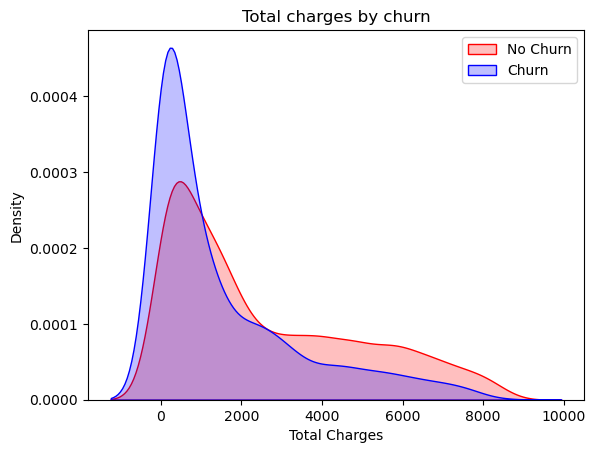

In [32]:
Mth= sns.kdeplot(new_df_dumies.TotalCharges[(new_df_dumies['Churn']== 0)],
                 color='Red',shade=True)
Mth= sns.kdeplot(new_df_dumies.TotalCharges[(new_df_dumies['Churn']== 1)],
                 color='Blue',shade=True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Total Charges')
Mth.set_title('Total charges by churn')
plt.show()

##### **Suprising insight** as higher churn at lower Total Charges
##### However if we combine the insights of 3 parameters i.e Tenure Charges, Monthly Charges and Total Charges
##### at lower tenure result into lower Total Charge. Hence all these 3 factors viz **Higher Monthly Charges**
##### are linked to **High Churn**


#### 11. Build corelation of all presictors with churn

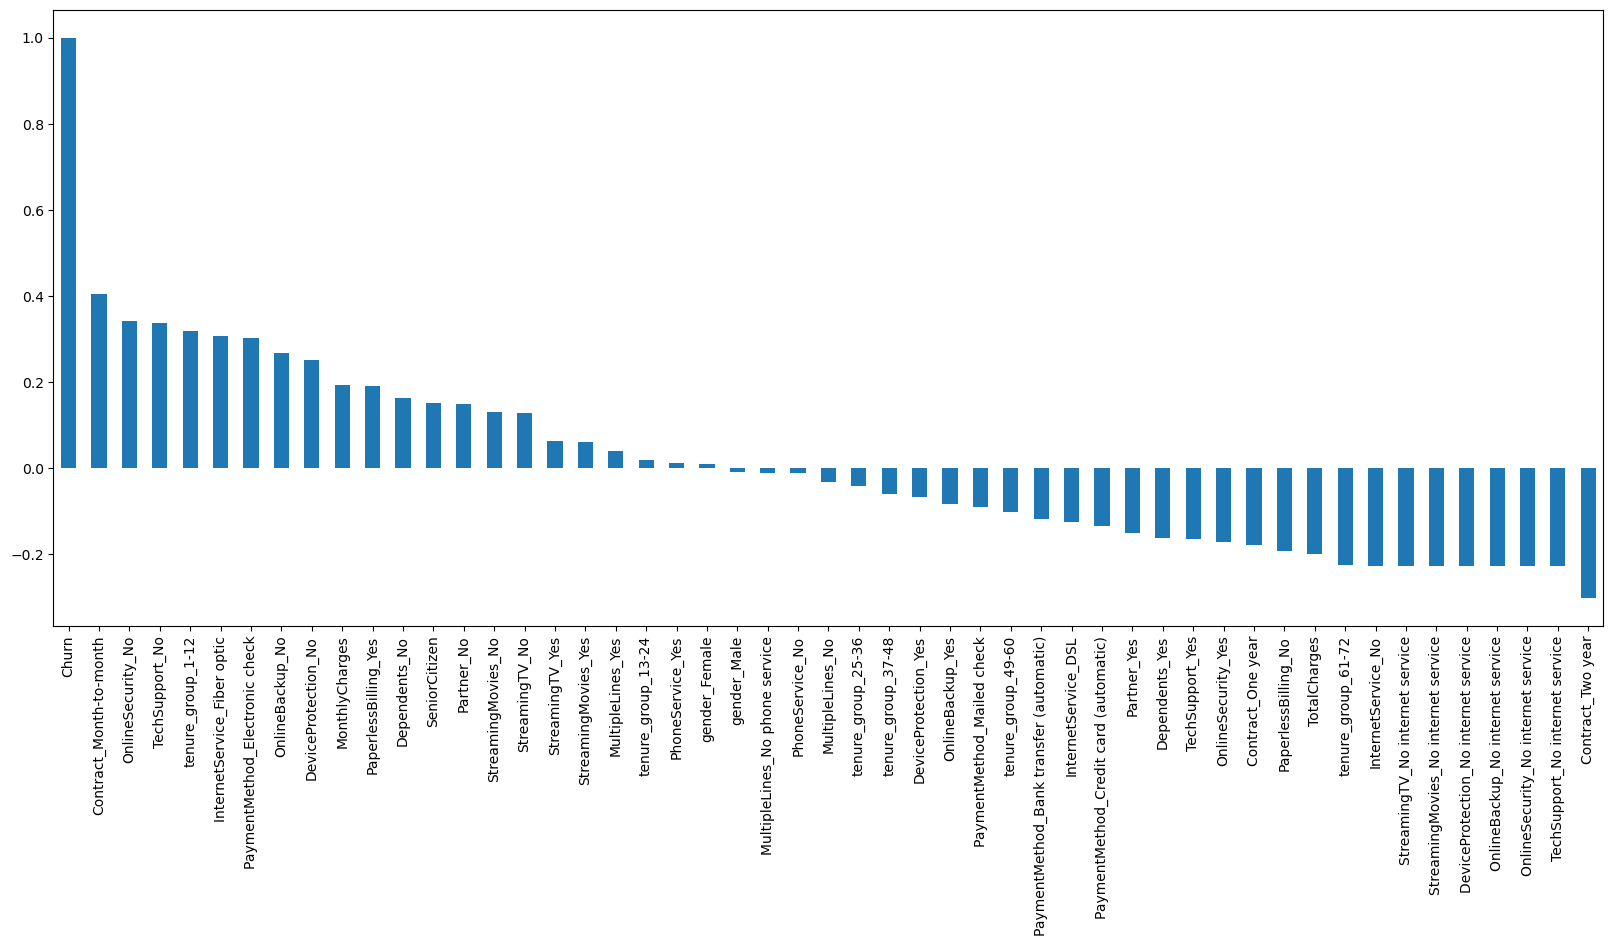

In [36]:
plt.figure(figsize=(20,8))
new_df_dumies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')
plt.show()

#### **Derived Insight:**

#### **HIGH Churn** seen in case of Month to month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet

#### **LOW Churn** is seens in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years

#### Factors like Gender, Availability of PhoneService and # of multiple lines have alomost NO impact on Churn

#### This is also evident from the Heatmap below

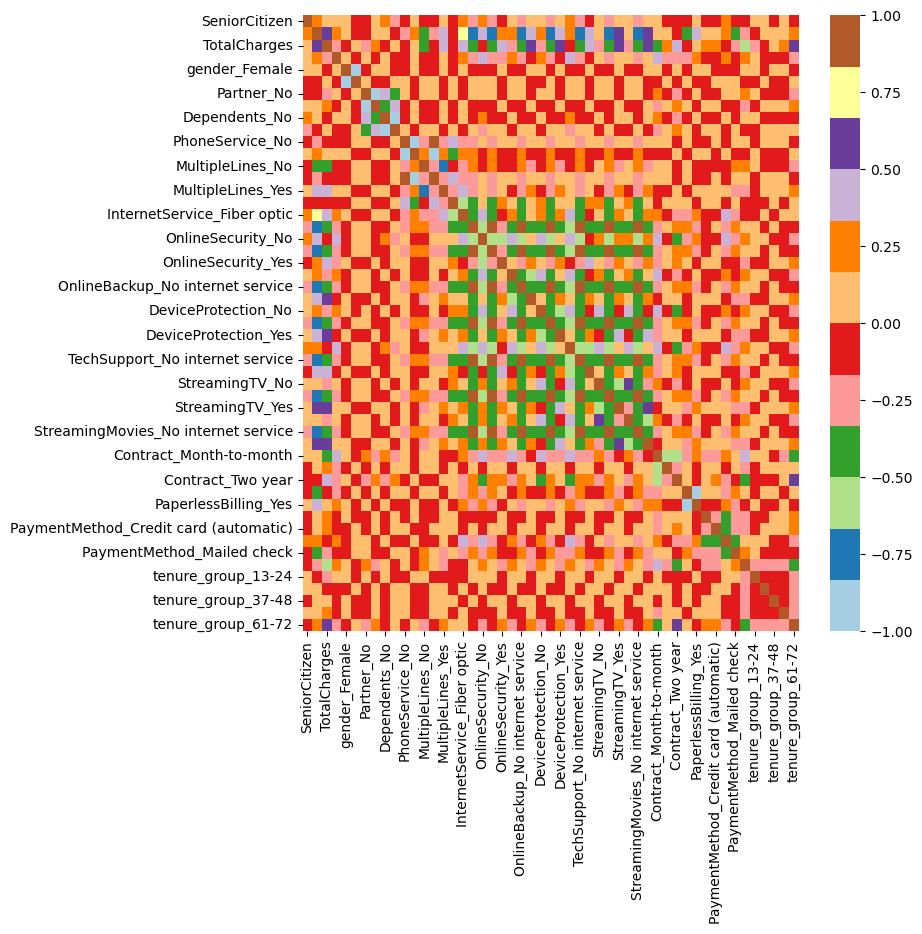

In [43]:
plt.figure(figsize=(8,8))
sns.heatmap(new_df_dumies.corr(), cmap="Paired")
plt.show()


## Bivariate Analysis

In [57]:
new_df1_target0=new_df.loc[new_df["Churn"]==0]
new_df1_target1=new_df.loc[new_df["Churn"]==1] 

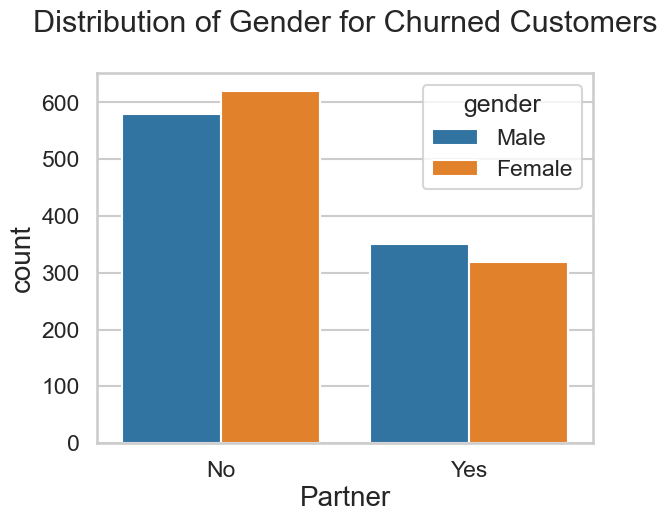

In [85]:
sns.countplot(data=new_df1_target1 ,x='Partner', hue='gender')
plt.title('Distribution of Gender for Churned Customers')
plt.show()

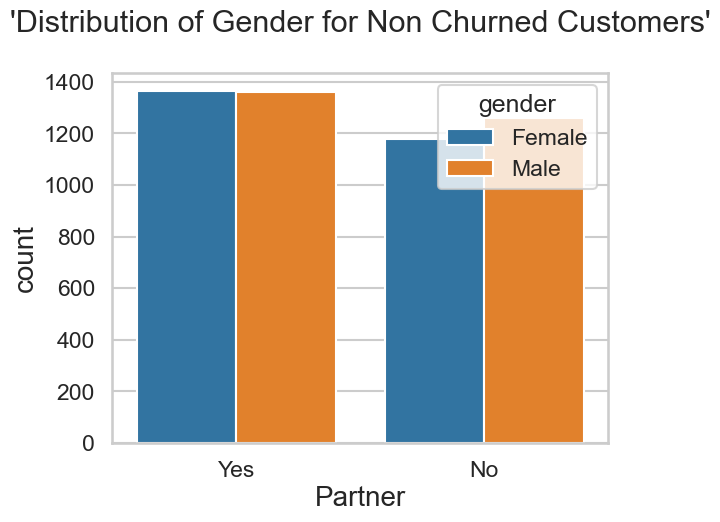

<Figure size 1500x1500 with 0 Axes>

In [65]:
sns.countplot(data=new_df1_target0 ,x='Partner', hue='gender')
plt.title("'Distribution of Gender for Non Churned Customers'")
plt.figure(figsize=(15,15))
plt.show()

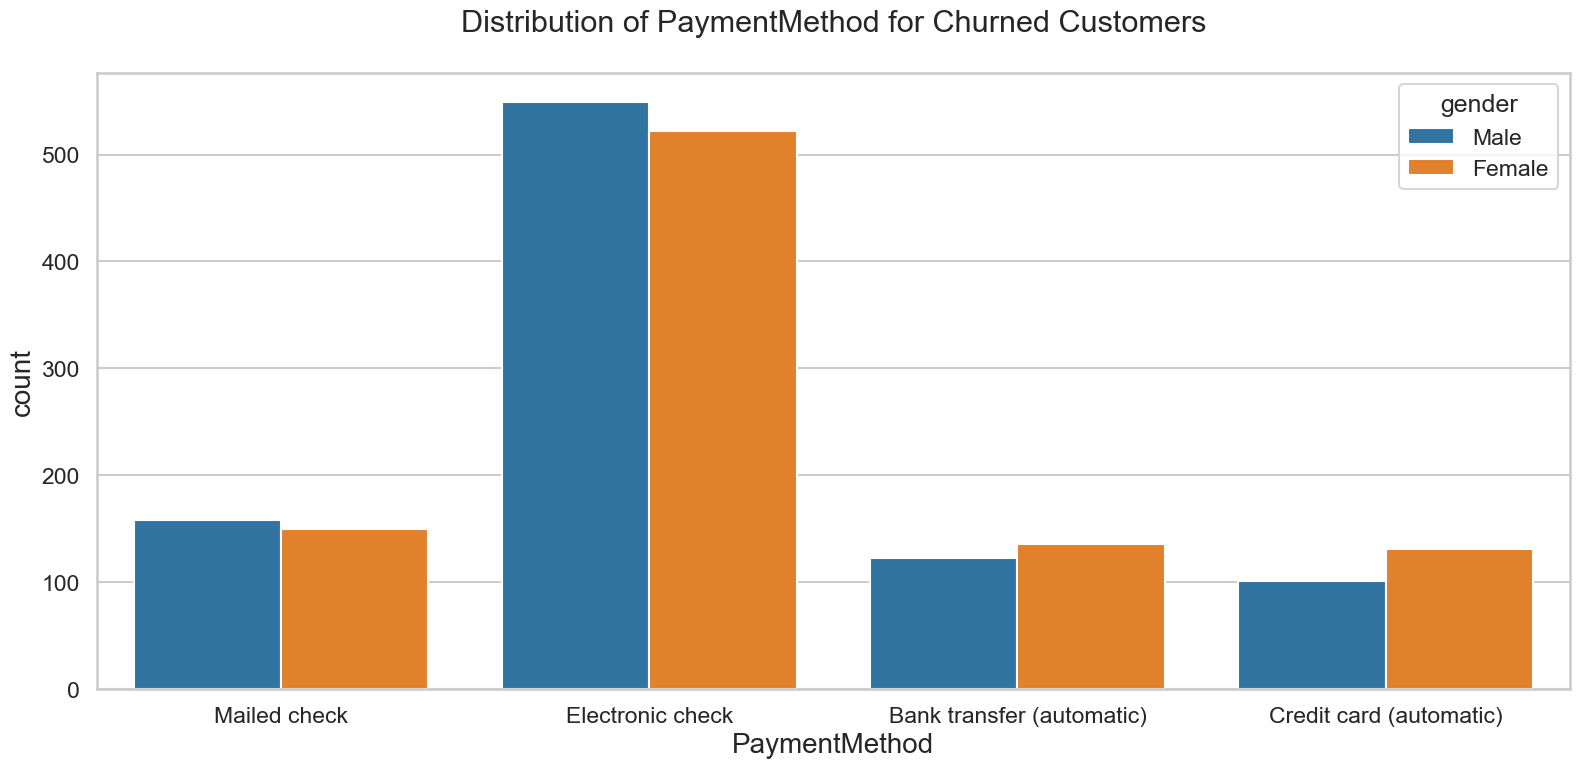

In [76]:
fig, ax = plt.subplots()

# Create the countplot
sns.countplot(data=new_df1_target1, x='PaymentMethod', hue='gender', ax=ax)
plt.title("Distribution of PaymentMethod for Churned Customers")

# Get the unique payment methods from the dataframe
payment_methods = new_df1_target0['PaymentMethod'].unique()
# Get the unique gender values
gender_values = new_df1_target0['gender'].unique()

# Calculate width based on actual variables instead of undefined ones
width = len(payment_methods) + 7 + 4*len(gender_values)
fig.set_size_inches(width, 8)
plt.show()

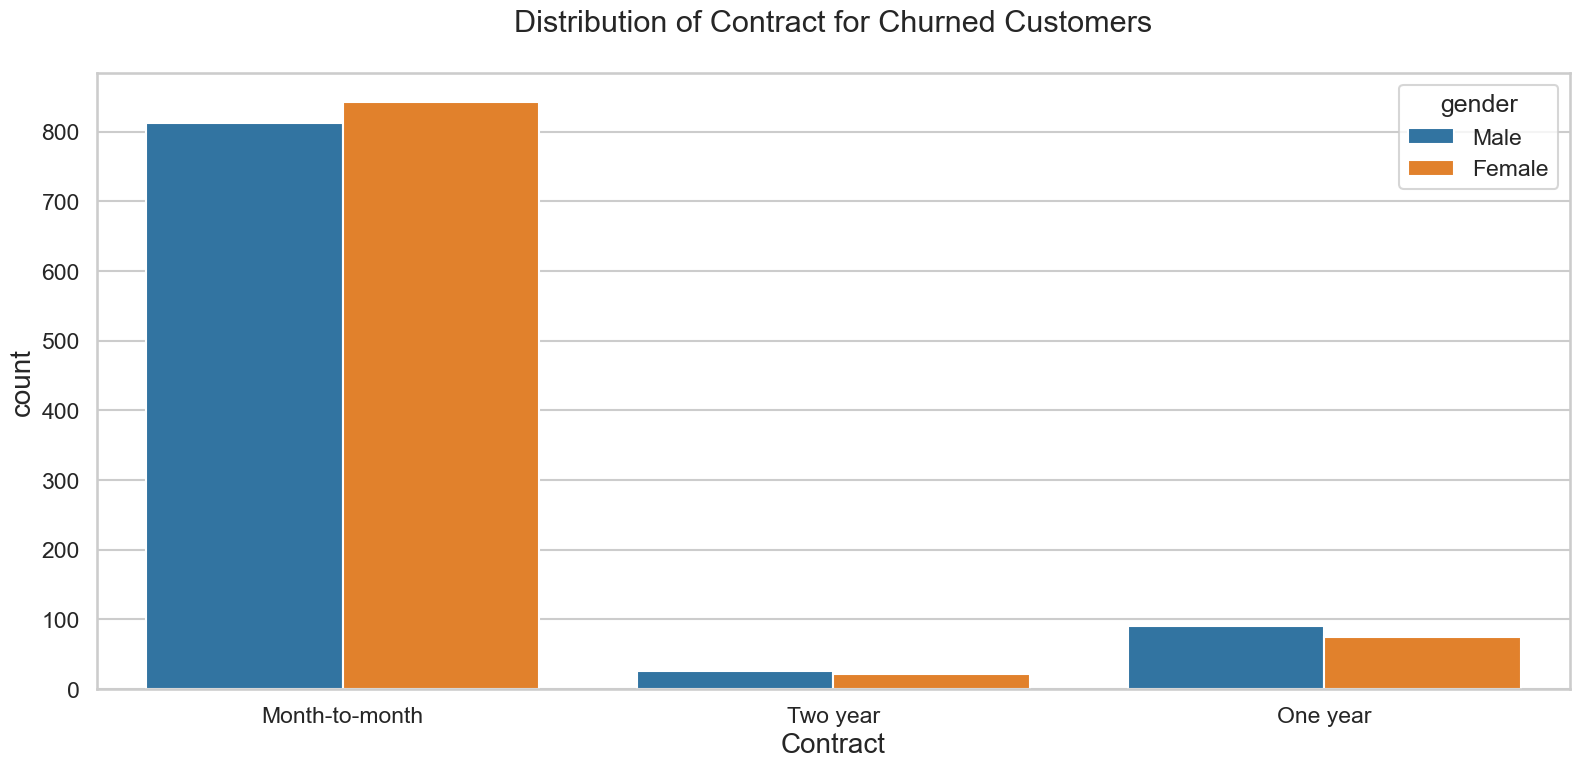

In [82]:
fig, ax = plt.subplots()

# Create the countplot
sns.countplot(data=new_df1_target1, x='Contract', hue='gender', ax=ax)  # Fixed missing closing quote after 'Contract'
plt.title('Distribution of Contract for Churned Customers')  # Fixed missing opening quote

# Get the unique payment methods from the dataframe
payment_methods = new_df1_target0['PaymentMethod'].unique()
# Get the unique gender values
gender_values = new_df1_target0['gender'].unique()

# Calculate width based on actual variables instead of undefined ones
width = len(payment_methods) + 7 + 4*len(gender_values)
fig.set_size_inches(width, 8)
plt.show()

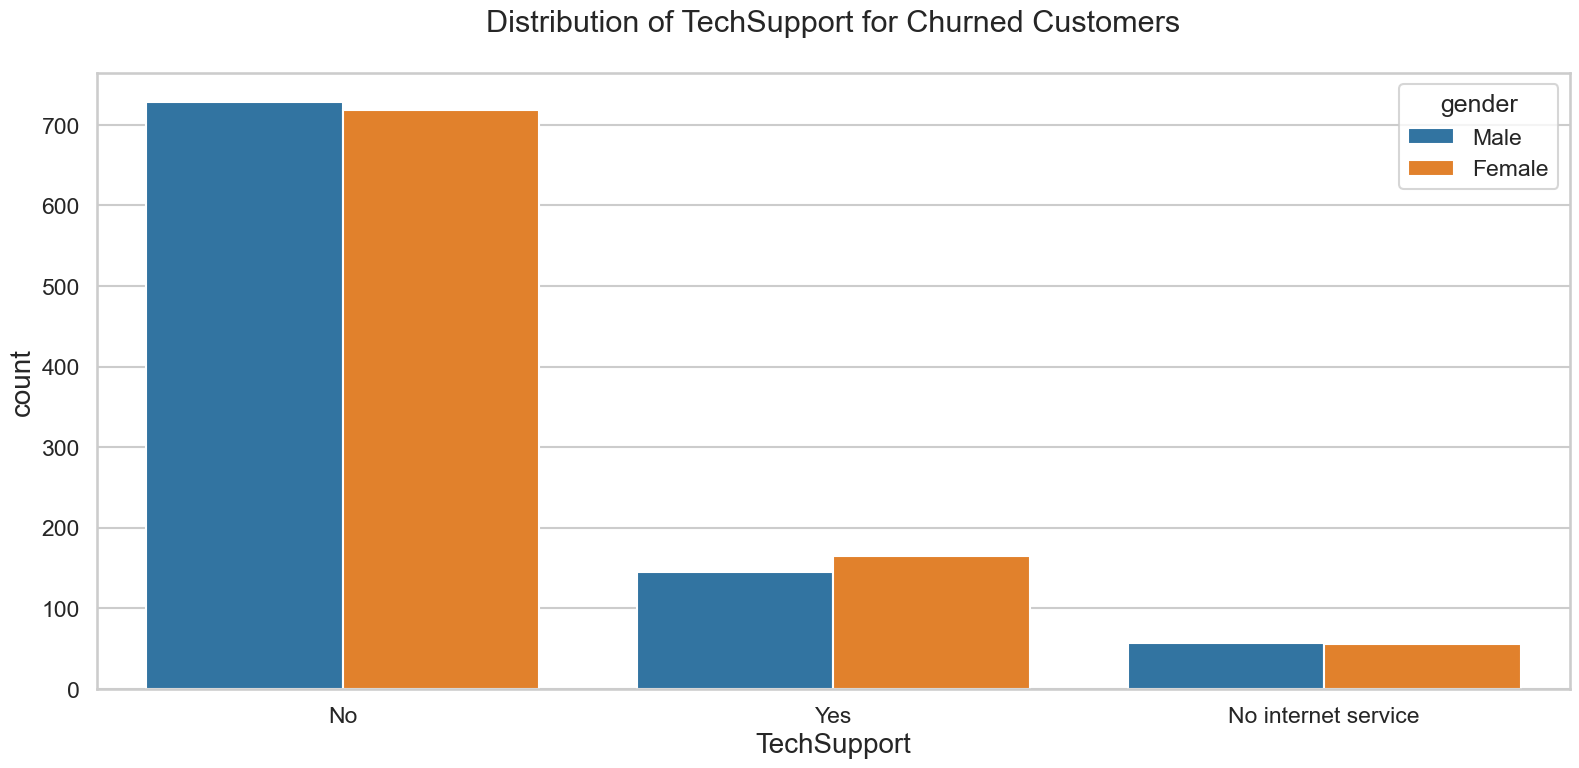

In [86]:
fig, ax = plt.subplots()

# Create the countplot
sns.countplot(data=new_df1_target1, x='TechSupport', hue='gender', ax=ax)  # Fixed missing closing quote after 'Contract'
plt.title('Distribution of TechSupport for Churned Customers' )  # Fixed missing opening quote

# Get the unique payment methods from the dataframe
payment_methods = new_df1_target0['PaymentMethod'].unique()
# Get the unique gender values
gender_values = new_df1_target0['gender'].unique()

# Calculate width based on actual variables instead of undefined ones
width = len(payment_methods) + 7 + 4*len(gender_values)
fig.set_size_inches(width, 8)
plt.show()

In [ ]:
col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',

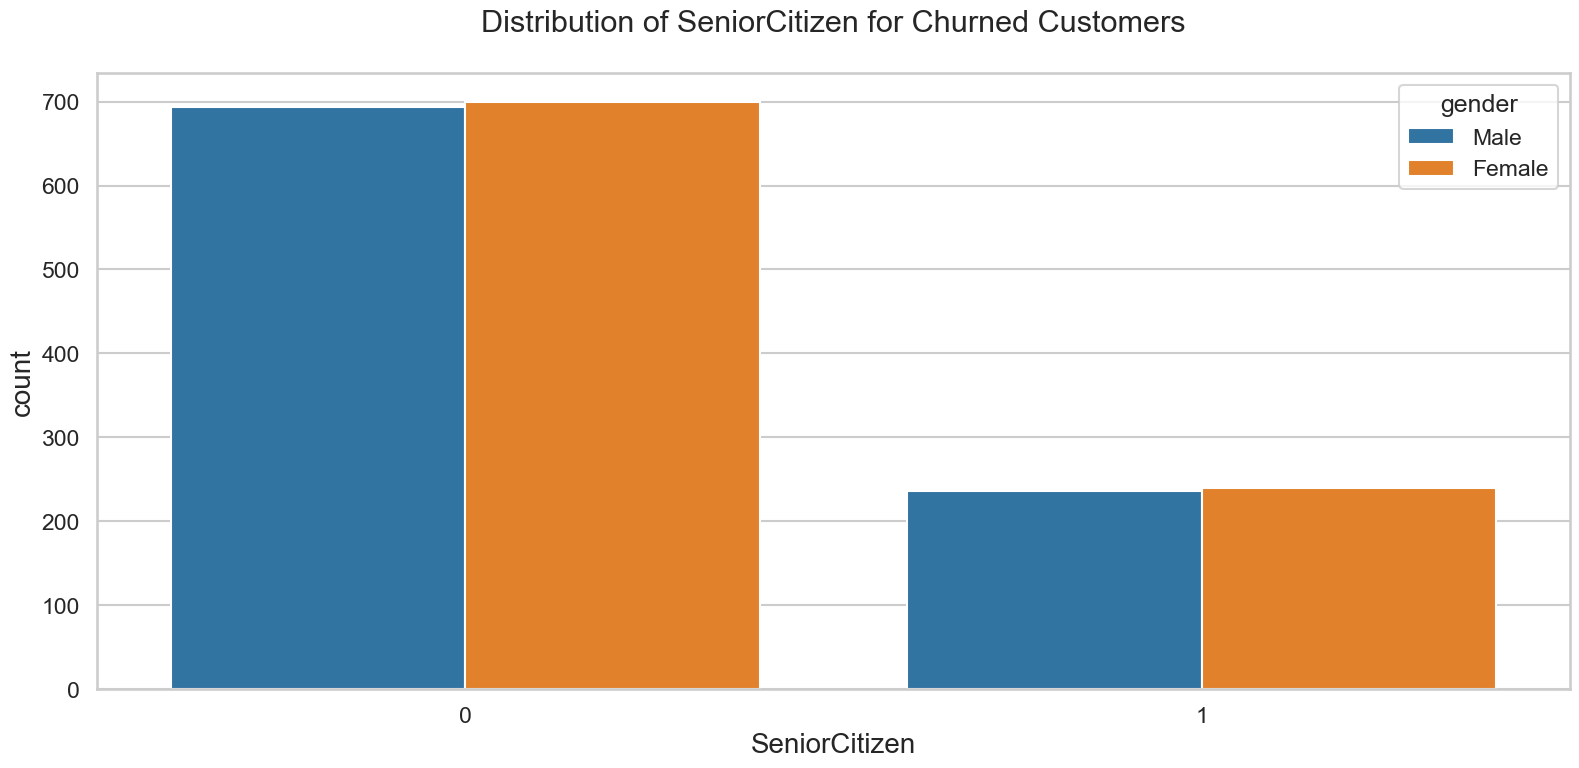

In [87]:
fig, ax = plt.subplots()

# Create the countplot
sns.countplot(data=new_df1_target1, x='SeniorCitizen', hue='gender', ax=ax)  # Fixed missing closing quote after 'Contract'
plt.title('Distribution of SeniorCitizen for Churned Customers')  # Fixed missing opening quote

# Get the unique payment methods from the dataframe
payment_methods = new_df1_target0['PaymentMethod'].unique()
# Get the unique gender values
gender_values = new_df1_target0['gender'].unique()

# Calculate width based on actual variables instead of undefined ones
width = len(payment_methods) + 7 + 4*len(gender_values)
fig.set_size_inches(width, 8)
plt.show()

## CONCLUSION
### These are some of the quick insights from this exercise:

### Electronic check medium are the highest churners
### Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
### No Online security, No Tech Support category are high churners
### Non senior Citizens are high churners
 

  

new_df_dumies.to_csv('df_churn.csv')